In [1]:
!pip install kaggle

!mkdir ~/.kaggle

!mv kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json


[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip
The syntax of the command is incorrect.
'mv' is not recognized as an internal or external command,
operable program or batch file.
'chmod' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
# to dowload the daatsets from kaggle in command prompt: kaggle datasets download -d gti-upm/leapgestrecog


In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer


In [5]:
# Set the path to the dataset
DATASET_PATH = 'C:/Users/A JAGADEESH/Desktop/Prodigy infotech/hand gesture/leapGestRecog'


In [8]:
import concurrent.futures 

In [9]:
def load_image(img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(64, 64), color_mode='grayscale')
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    label = os.path.basename(os.path.dirname(img_path))
    return img_array, label

def load_data(dataset_path):
    images = []
    labels = []
    img_paths = []
    for dirpath, dirnames, filenames in os.walk(dataset_path):
        for filename in filenames:
            if filename.endswith('.png'):
                img_path = os.path.join(dirpath, filename)
                img_paths.append(img_path)
                
    with concurrent.futures.ThreadPoolExecutor() as executor:
        results = list(executor.map(load_image, img_paths))
    
    for img_array, label in results:
        images.append(img_array)
        labels.append(label)
    
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

# Set the path to the dataset
DATASET_PATH = 'C:/Users/A JAGADEESH/Desktop/Prodigy infotech/hand gesture/leapGestRecog'

images, labels = load_data(DATASET_PATH)

# Normalize the images
images = images / 255.0

# Encode the labels
label_binarizer = LabelBinarizer()
labels = label_binarizer.fit_transform(labels)


In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)


In [11]:
# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    shear_range=0.1,
    horizontal_flip=True
)
datagen.fit(X_train)


In [12]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(label_binarizer.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\A JAGADEESH\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [13]:
# Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=25, validation_data=(X_test, y_test))


Epoch 1/25


C:\Users\A JAGADEESH\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 73s 69ms/step - accuracy: 0.5965 - loss: 1.1149 - val_accuracy: 0.9783 - val_loss: 0.0486
Epoch 2/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 73s 73ms/step - accuracy: 0.9400 - loss: 0.1805 - val_accuracy: 0.9961 - val_loss: 0.0151
Epoch 3/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 74s 74ms/step - accuracy: 0.9709 - loss: 0.0929 - val_accuracy: 0.9984 - val_loss: 0.0082
Epoch 4/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 70s 70ms/step - accuracy: 0.9788 - loss: 0.0643 - val_accuracy: 0.9971 - val_loss: 0.0091
Epoch 5/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 73s 73ms/step - accuracy: 0.9868 - loss: 0.0429 - val_accuracy: 0.9986 - val_loss: 0.0033
Epoch 6/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 72s 72ms/step - accuracy: 0.9878 - loss: 0.0419 - val_accuracy: 0.9989 - val_loss: 0.0039
Epoch 7/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 69s 69ms/step - accuracy: 0.9881 - loss: 0.0374 - val_accuracy: 0.9986 - val_loss: 0.0067
Epoch 8/25
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 75s 75ms/step - accuracy: 0.9898 - loss: 0.03

In [14]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'Test accuracy: {test_accuracy:.2f}')


250/250 - 5s - 20ms/step - accuracy: 0.9995 - loss: 0.0027
Test accuracy: 1.00


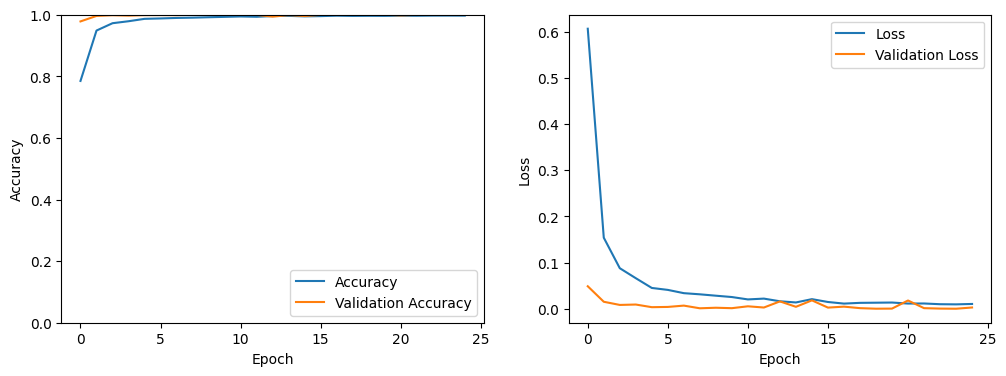

In [15]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()


In [17]:
# Make predictions
def predict_image(model, img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(64, 64), color_mode='grayscale')
    img_array = tf.keras.preprocessing.image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    predicted_label = label_binarizer.inverse_transform(prediction)
    return predicted_label[0]

# Example usage of prediction
sample_img_path = 'C:\\Users\\A JAGADEESH\\Desktop\\Prodigy infotech\\hand gesture\\leapGestRecog\\00\\06_index\\frame_00_06_0016.png'
 # Update this path to an image you want to test
predicted_gesture = predict_image(model, sample_img_path)
print(f'Predicted gesture: {predicted_gesture}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
Predicted gesture: 06_index
